# First approach

I didn't want to throw this one out, wanted it for reference and to see what I can attempt to do better. (Please ignore if its not right)

Problem: Deep learning can be used to learn and recognize a variety of objects contained in images. The results can be used for face recognition, character recognition, gesture recognition, and a range of additional applications. The goal of this assignment is to train a convolutional neural network to recognize the alphabet character that is being signed using the American Sign Language (ASL) gesture. This type of learning problem has potential for use not only in automatically recognizing and understanding sign language, but also for performing gesture recognition and other related image-based recognition tasks.

Data: six 25x25, black and white images for each of the letters "c", "d", and "e". These are stored in PGM (ASCII) format. Each of the 400 pixels (features) is represented by a value in the range 0-255. There are also five colored image files in GIF and JPEG format, as well as a few additional black and white images (that you can play with if you want to).
Textbook Source: Chapter 4


In [ ]:
# import libraries
import os
import numpy as np
import imageio
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Develop (in python) the code that implements a convolutional neural network to learn a two-class concept that distinguishes the sign language "c" letters from the "d" letters. {20}


<ipython-input-54-c7224f915be7>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


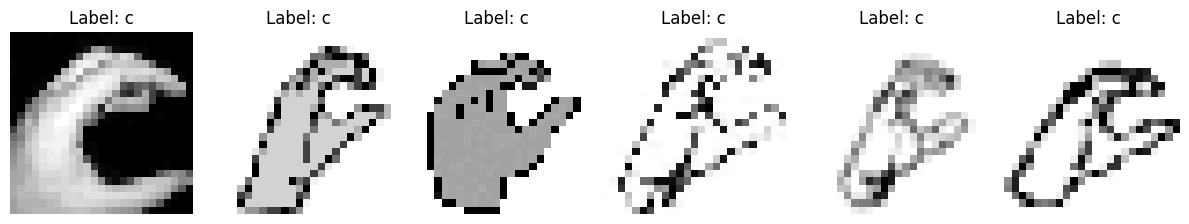

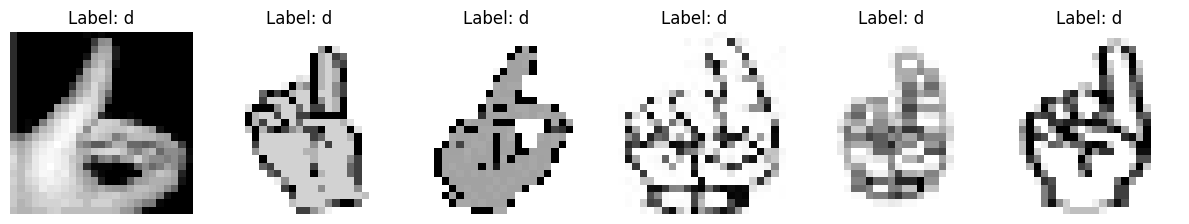

In [ ]:
def load_images(path, labels=('c', 'd'), is_test=False):
    images, targets = [], []
    label_map = {label: idx for idx, label in enumerate(labels)}

    for file in sorted(os.listdir(path)): # Iterate through files in directory
        label = file[0].lower()
        ext = file.split('.')[-1].lower()

        if label not in labels:
            continue
        if not ((not is_test and ext == 'pgm') or (is_test and ext in ['gif', 'jpg', 'jpeg', 'png'])):
            continue

        img_path = os.path.join(path, file) # Construct full image path
        img = imageio.imread(img_path)

        if is_test:
            if img.ndim == 3:
                img = rgb2gray(img)
            img = resize(img, (25, 25), anti_aliasing=True)

        img = img / 255.0
        images.append(img)
        targets.append(label_map[label])

    X = np.array(images).reshape(-1, 25, 25, 1)
    y = np.array(targets)
    return X, y

X_train, y_train = load_images('.')  # for Colab file directory

# To confirm c and d images are imported
def preview_images(X, y, label_map={0: 'c', 1: 'd'}, images_per_page=6):
    total = len(X)
    for start in range(0, total, images_per_page):
        end = min(start + images_per_page, total)
        plt.figure(figsize=(images_per_page * 2, 3))
        for i in range(end - start):
            plt.subplot(1, images_per_page, i + 1)
            plt.imshow(X[start + i].reshape(25, 25), cmap='gray')
            lbl = y[start + i]
            plt.title(f"Label: {label_map.get(lbl, lbl)}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

preview_images(X_train, y_train)


In [ ]:
# Building CNN; using sparse categorical crossentropy since labels are integers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(25, 25, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training on 10 epochs/runs
model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2812 - loss: 0.7157
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6458 - loss: 0.6716
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8021 - loss: 0.6612
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8542 - loss: 0.6532
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9271 - loss: 0.6241
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8646 - loss: 0.6082
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8542 - loss: 0.6092
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.5216
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8646 - loss: 0.5365
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.4459


# 2. Test the models on the test data (4 colored images - a1, a3, c2, d2) and show below the output that was generated. {20}


<ipython-input-56-9fc9eee94f45>:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Prediction Results:
Image 1: True='a', Pred='d' (0.50)
Image 2: True='a', Pred='d' (0.50)
Image 3: True='c', Pred='d' (0.50)
Image 4: True='d', Pred='d' (0.50)


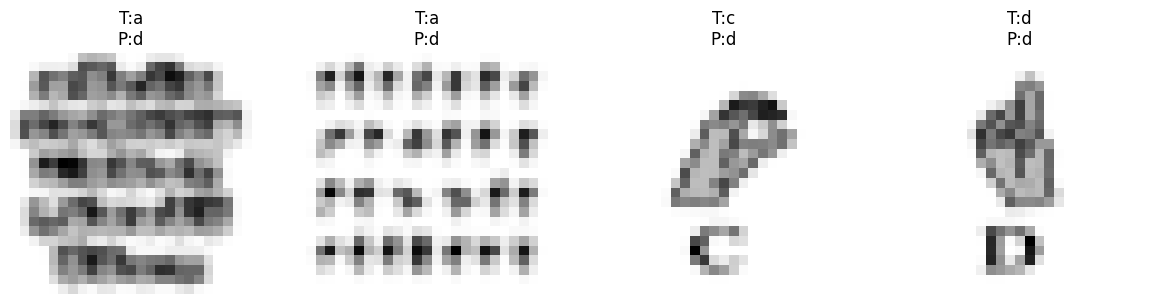

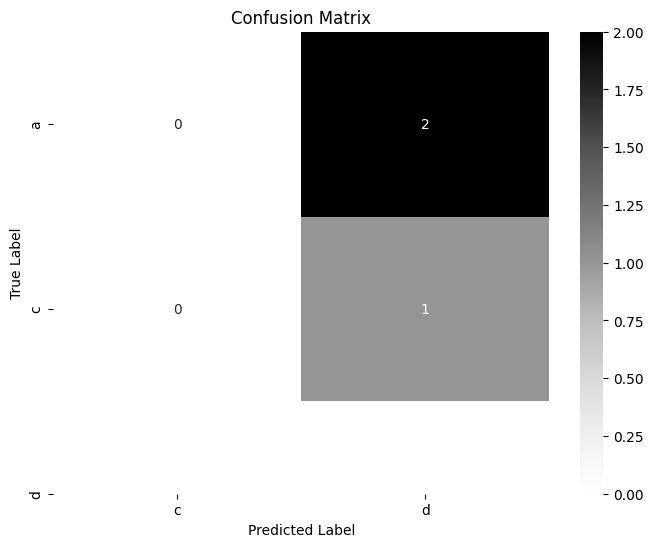

In [ ]:
def evaluate_model(model, X_test, y_test, true_label_map, model_label_map):
    # Get predictions and probabilities.
    probs = model.predict(X_test)
    pred = np.argmax(probs, axis=1)

    print("Prediction Results:")
    for i in range(len(X_test)):
        conf = probs[i][pred[i]]
        true_label = true_label_map[y_test[i]]
        pred_label = model_label_map.get(pred[i], "Unknown")
        print(f"Image {i+1}: True='{true_label}', Pred='{pred_label}' ({conf:.2f})")

    # Display images with their true and predicted labels.
    plt.figure(figsize=(12, 3))
    for i in range(len(X_test)):
        plt.subplot(1, len(X_test), i + 1)
        plt.imshow(X_test[i].reshape(25, 25), cmap='gray')
        plt.title(f"T:{true_label_map[y_test[i]]}\nP:{model_label_map.get(pred[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # **Confusion Matrix**
    # Filter y_test and pred to include only classes 'c' and 'd'
    filtered_indices = np.where(np.isin(y_test, list(model_label_map.keys())))
    filtered_y_test = y_test[filtered_indices]
    filtered_pred = pred[filtered_indices]

    cm = confusion_matrix(filtered_y_test, filtered_pred)  # Calculate confusion matrix


    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greys",
                xticklabels=model_label_map.values(), yticklabels=true_label_map.values())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

def load_images(path, labels=('a', 'c', 'd'), is_test=False, specific_files=None):
    images, targets = [], []
    label_map = {label: idx for idx, label in enumerate(labels)}

    files_to_load = specific_files if specific_files else sorted(os.listdir(path))

    for file in files_to_load:
        label = file[0].lower()
        ext = file.split('.')[-1].lower()

        if label not in labels:
            continue
        if not ((not is_test and ext == 'pgm') or (is_test and ext in ['gif', 'jpg', 'jpeg', 'png'])):
            continue

        img_path = os.path.join(path, file)
        img = imageio.imread(img_path)

        if is_test:
            if img.ndim == 3:
                img = rgb2gray(img)
            img = resize(img, (25, 25), anti_aliasing=True)

        img = img / 255.0
        images.append(img)
        targets.append(label_map[label])

    X = np.array(images).reshape(-1, 25, 25, 1)
    y = np.array(targets)
    return X, y


# Load the test data (specified 4 images: a1.gif, a3.gif, c2.gif, d2.gif)
specific_test_files = ['a1.gif', 'a3.gif', 'c2.gif', 'd2.gif']
X_test, y_test = load_images('.', labels=('a', 'c', 'd'), is_test=True, specific_files=specific_test_files)

# Mapping: the true labels and the labels model is trained on
true_label_map = {0: 'a', 1: 'c', 2: 'd'}
model_label_map = {0: 'c', 1: 'd'}

# Evaluate model
evaluate_model(model, X_test, y_test, true_label_map, model_label_map)

# 3. Test the models on the training data (the black and white images) and show below the output that was generated. {20}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Image a2.gif: Predicted Class: c, Probabilities: [[0.56692916 0.43307078]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image a4.jpg: Predicted Class: c, Probabilities: [[0.5711036  0.42889643]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image a5.gif: Predicted Class: c, Probabilities: [[0.56333816 0.43666178]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image a6.gif: Predicted Class: c, Probabilities: [[0.55985975 0.44014022]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


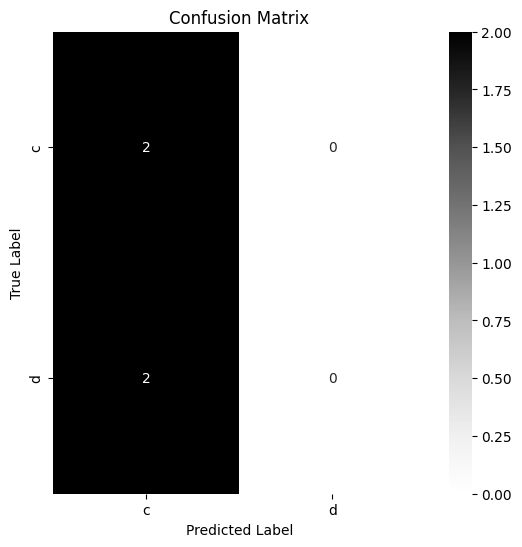

In [ ]:
new_image_paths = ['a2.gif', 'a4.jpg', 'a5.gif', 'a6.gif']  # Load and preprocess

def load_and_preprocess_images(image_paths, label):
    images = []
    labels = []
    for path in image_paths:
        img = Image.open(path).convert('L')  # Load as grayscale
        img = img.resize((25, 25))  # Resize to a common size
        img_array = np.array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Define an evaluate_model function to print predictions with labels
def evaluate_model(model, images, image_paths, model_label_map):
    for i, image in enumerate(images):
        prediction = model.predict(image.reshape(1, 25, 25, 1))
        predicted_class_index = np.argmax(prediction)  # Get index of the predicted class
        predicted_class_label = model_label_map.get(predicted_class_index, "Unknown")  # Map index to label
        print(f"Image {image_paths[i]}: Predicted Class: {predicted_class_label}, Probabilities: {prediction}")

# Load and preprocess new images using same function used for training
new_images, _ = load_and_preprocess_images(new_image_paths, label=None)

model_label_map = {0: 'c', 1: 'd'}

# Evaluate the model on the new images
evaluate_model(model, new_images, new_image_paths, model_label_map)

# Get predictions for all training images
all_predictions = [np.argmax(model.predict(img.reshape(1, 25, 25, 1))) for img in new_images]
true_labels = [0, 1, 0, 1]  #  0 for 'c', 1 for 'd'

# Create confusion matrix
cm = confusion_matrix(true_labels, all_predictions)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys",
            xticklabels=model_label_map.values(), yticklabels=model_label_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 5. Try it with a varying number of hidden layers: 3, 4, and 5. How does this affect the performance results, and why? {10}


In [ ]:
# Define a single evaluate_model function to handle both cases
def evaluate_model(model, data, data_labels, **kwargs):
    if 'true_label_map' in kwargs and 'model_label_map' in kwargs:
        true_label_map = kwargs['true_label_map']
        model_label_map = kwargs['model_label_map']

    elif 'image_paths' in kwargs:
        # Evaluate on training data
        image_paths = kwargs['image_paths']
        model_label_map = kwargs.get('model_label_map', {0: 'c', 1: 'd'})
    else:
        raise ValueError("Invalid arguments for evaluate_model. Provide either 'true_label_map' and 'model_label_map' or 'image_paths'.")

# Try different numbers of hidden layers
hidden_layers_configs = [3, 4, 5]
for num_layers in hidden_layers_configs:
    print(f"\nTraining model with {num_layers} hidden layers:")
    model = create_and_train_model(num_layers)
    model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

    # Evaluate the model on test data
    evaluate_model(model, X_test, y_test, true_label_map=true_label_map, model_label_map=model_label_map)

    # Evaluate on training data
    evaluate_model(model, new_images, _, image_paths=new_image_paths, model_label_map=model_label_map)


Training model with 3 hidden layers:
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4271 - loss: 0.6997
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6562 - loss: 0.6845
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7917 - loss: 0.6758
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6354 - loss: 0.6702 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6562 - loss: 0.6658
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7708 - loss: 0.6435
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7917 - loss: 0.6648 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.6104
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8646 - loss: 0.6065
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.4897

Training model with 4 hidden layers:
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5938 - loss: 0.6991
Epoch 2/

# 6. Now try it as a three-class problem that distinguishes the "c", "d", and "e" letters from each other. Submit the input files used, your resulting output files, and summarize the results. {20}



Epoch 1/10


<ipython-input-56-9fc9eee94f45>:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2546 - loss: 1.1215
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5590 - loss: 1.0524
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5058 - loss: 1.0362
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7060 - loss: 1.0141
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9363 - loss: 0.9875
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8044 - loss: 0.9726
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8600 - loss: 0.8844
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6968 - loss: 0.9002
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.7796
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9815 - loss: 0.7355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction Results:
Image 1: True='a', Pred='d' (0.35)
Image 2: True='a', Pred='d' (0.35)
Image 3: True='c', Pred='d' (0.35)
Image 4: True='d'

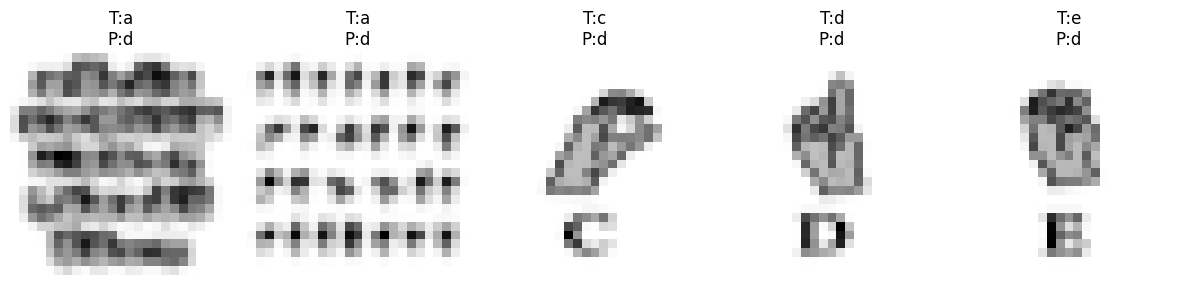

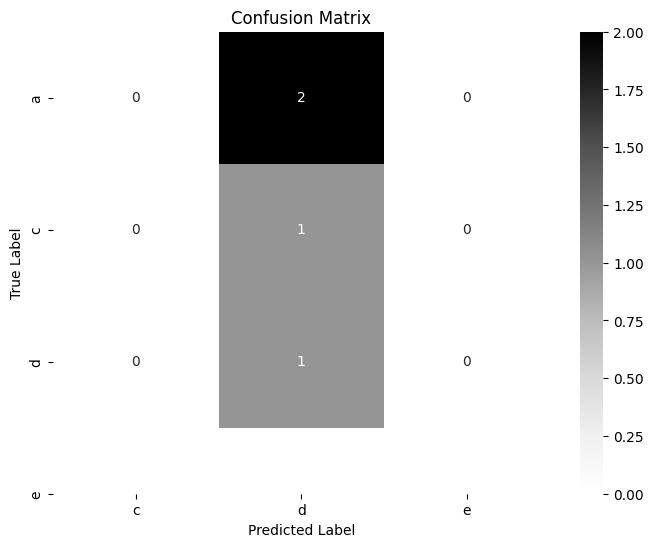

In [ ]:
# Load training data with 'c', 'd', and 'e'
X_train, y_train = load_images('.', labels=('c', 'd', 'e'))

# Update the model's output layer for 3 classes
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(25, 25, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), # Flatten the output before the Dense layer
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax') # Output layer with 3 units and softmax
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

# Load test data, including 'e' images
specific_test_files = ['a1.gif', 'a3.gif', 'c2.gif', 'd2.gif', 'e2.gif']
X_test, y_test = load_images('.', labels=('a', 'c', 'd', 'e'), is_test=True, specific_files=specific_test_files)

# Update label maps for 3 classes
true_label_map = {0: 'a', 1: 'c', 2: 'd', 3: 'e'}  # Include 'e'
model_label_map = {0: 'c', 1: 'd', 2: 'e'}

# Evaluate the model and generate confusion matrix
evaluate_model(model, X_test, y_test, true_label_map, model_label_map)

# ===================================================================================================================================================================================================================================================================================================================================================================================================================

# Second approach

In [2]:
# import libraries
import os
import numpy as np
import imageio
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
import itertools

# 1. Develop (in python) the code that implements a convolutional neural network to learn a two-class concept that distinguishes the sign language "c" letters from the "d" letters. (Second approach)

In [17]:
def load_images(path, labels=('c', 'd'), is_test=False, mode='train_bw', force_three_channel=False): # Added mode and force_three_channel parameters
    images, targets = [], []
    label_map = {label: idx for idx, label in enumerate(labels)}

    # Select file extensions based on mode
    if mode in ['train_bw', 'test_bw']:
        valid_ext = ['pgm']
    elif mode in ['train_color', 'test_color']:
        valid_ext = ['gif', 'jpg', 'jpeg', 'png']
    else:
        raise ValueError("Invalid mode. Choose from 'train_bw', 'test_bw', 'train_color', 'test_color'")

    for file in sorted(os.listdir(path)): # Iterate through files in Colab directory
        label = file[0].lower()
        ext = file.split('.')[-1].lower()

        # Skip files that don't match the specified labels or extensions for the current mode
        if label not in labels or ext not in valid_ext:
            continue

        img_path = os.path.join(path, file) # Construct full image path
        img = imageio.imread(img_path)

        if is_test or mode in ['test_bw', 'test_color']:  # Check if it's test mode or a test-related mode
            if img.ndim == 3:
                img = rgb2gray(img)
            img = resize(img, (25, 25), anti_aliasing=True)

        if force_three_channel:
            # If the image is grayscale (2D), convert it to 3-channel by stacking it 3 times
            if img.ndim == 2:
                img = np.stack([img, img, img], axis=-1)
            # If the image has an alpha channel (4 channels), remove it
            elif img.ndim == 3 and img.shape[2] == 4:
                img = img[:, :, :3]

        img = img / 255.0
        images.append(img)
        targets.append(label_map[label])

    X = np.array(images).reshape(-1, 25, 25, img.shape[-1] if force_three_channel else 1)
    y = np.array(targets)
    return X, y

# Load the training data:
X_train, y_train = load_images('.')  # for Colab file directory


<ipython-input-17-69c6bee4d605>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


# 2. Test the models on the test data (the 4 colored images – a1, a3, c2, d2) and show below the output that was generated. (Second approach)

In [20]:
# Building CNN; using sparse categorical crossentropy since labels are integers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(25, 25, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])


def experiment_1(epochs=10, batch_size=4):
    print("\n=== Q2: Experiment 1 (Train on BW, Test on Colored)")
    # Train on BW images (PGM) and test on colored images
    X_train, y_train = load_images('.', mode='train_bw', force_three_channel=True)
    X_test, y_test = load_images('.', labels=('a', 'c', 'd'), is_test=True, mode='test_color', force_three_channel=True)

    # Filter out 'a' from y_test and corresponding images from X_test
    # Assuming 'a' is labeled as 0, 'c' as 1, and 'd' as 2 in y_test
    valid_indices = np.where(y_test != 0)  # Indices where y_test is not 'a'
    y_test = y_test[valid_indices]  # Keep only 'c' and 'd' labels
    X_test = X_test[valid_indices]  # Keep corresponding images

    # Adjust labels to 0 and 1 for 'c' and 'd'
    y_test[y_test == 1] = 0  # Change 'c' label from 1 to 0
    y_test[y_test == 2] = 1  # Change 'd' label from 2 to 1


    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)
    #You will likely need to add code here to train and evaluate the model
    return X_test, y_test # Added a return statement to get X_test and y_test


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Changed loss to 'sparse_categorical_crossentropy'

#training on 10 epochs/runs
model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

print("Training data shape:", X_train.shape)
X_test, y_test = experiment_1() # Call experiment_1() to get X_test and y_test
print("Test data shape:", X_test.shape) # Now X_test is defined

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5312 - loss: 0.7063
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5938 - loss: 0.6920
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6042 - loss: 0.6657 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - loss: 0.6405
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - loss: 0.6640
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8646 - loss: 0.6019
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6458 - loss: 0.6194
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7812 - loss: 0.6238
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9271 - loss: 0.5768 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8646 - loss: 0.5650
Training data shape: (12, 25, 25, 1)

=== Q2: Experiment 1 (Train on BW, Test on Colored)


<ipython-input-17-69c6bee4d605>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


Test data shape: (2, 25, 25, 3)


# 3. Test the models on the training data (the black and white image files) and show below the output that was generated. (Second approach)

In [21]:
def experiment_2(epochs=10, batch_size=4):
    print("\n=== Q3: Experiment 2 (Train on Colored, Test on BW)")
    # Train on colored images and test on BW images (PGM)
    X_train, y_train = load_images('.', mode='train_color', force_three_channel=True)
    X_test, y_test = load_images('.', mode='test_bw', force_three_channel=True)
    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)

    print("Training data shape:", X_train.shape)
    print("Test data shape:", X_test.shape)

    input_shape = X_train.shape[1:]
    model = model(input_shape)
    history = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, verbose=2)

    score = model.evaluate(X_test, y_test_cat, verbose=0)
    print("Test loss: {:.4f}, Test accuracy: {:.4f}".format(score[0], score[1]))
    pred = model.predict(X_test)
    pred_labels = np.argmax(pred, axis=1)
    cm = confusion_matrix(y_test, pred_labels)
    print("Confusion Matrix:")
    print(cm)
    plot_confusion_matrix(cm, classes=['c', 'd'], title='Q3: Exp2 Confusion Matrix')


# Building CNN; using sparse categorical crossentropy since labels are integers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(25, 25, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Changed loss to 'sparse_categorical_crossentropy'

#training on 10 epochs/runs
model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5417 - loss: 0.6874
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5208 - loss: 0.7101
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6875 - loss: 0.6587
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8646 - loss: 0.6093
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7083 - loss: 0.6311
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8854 - loss: 0.5723
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9583 - loss: 0.5828
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9583 - loss: 0.5309
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8750 - loss: 0.5160
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.4678


# 5. Try it with a varying number of hidden layers: 3, 4, and 5. How does this affect the performance results, and why? (Second approach)

=== Experiment 1: Train on Black & White (PGM); Test on Colored Images ===

=== Experiment 1 with 3 hidden layers ===
Training data shape: (12, 25, 25, 3)
Testing data shape: (2, 25, 25, 3)
Epoch 1/10


<ipython-input-22-0d620705e43d>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


3/3 - 2s - 642ms/step - accuracy: 0.4167 - loss: 0.6941
Epoch 2/10
3/3 - 0s - 18ms/step - accuracy: 0.5000 - loss: 0.6957
Epoch 3/10
3/3 - 0s - 20ms/step - accuracy: 0.2500 - loss: 0.6978
Epoch 4/10
3/3 - 0s - 18ms/step - accuracy: 0.5833 - loss: 0.6911
Epoch 5/10
3/3 - 0s - 20ms/step - accuracy: 0.6667 - loss: 0.6902
Epoch 6/10
3/3 - 0s - 20ms/step - accuracy: 0.6667 - loss: 0.6900
Epoch 7/10
3/3 - 0s - 20ms/step - accuracy: 0.6667 - loss: 0.6906
Epoch 8/10
3/3 - 0s - 18ms/step - accuracy: 0.5833 - loss: 0.6873
Epoch 9/10
3/3 - 0s - 20ms/step - accuracy: 0.5833 - loss: 0.6932
Epoch 10/10
3/3 - 0s - 18ms/step - accuracy: 0.3333 - loss: 0.6999
Test loss: 0.6932, Test accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Confusion Matrix:
[[1 0]
 [1 0]]


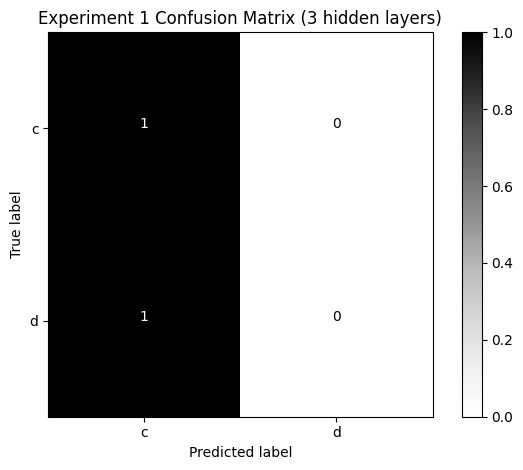


=== Experiment 1 with 4 hidden layers ===
Training data shape: (12, 25, 25, 3)
Testing data shape: (2, 25, 25, 3)
Epoch 1/10


<ipython-input-22-0d620705e43d>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 2s - 742ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 2/10
3/3 - 0s - 18ms/step - accuracy: 0.5000 - loss: 0.6953
Epoch 3/10
3/3 - 0s - 18ms/step - accuracy: 0.4167 - loss: 0.6981
Epoch 4/10
3/3 - 0s - 20ms/step - accuracy: 0.5833 - loss: 0.6908
Epoch 5/10
3/3 - 0s - 20ms/step - accuracy: 0.5833 - loss: 0.6995
Epoch 6/10
3/3 - 0s - 18ms/step - accuracy: 0.4167 - loss: 0.6936
Epoch 7/10
3/3 - 0s - 20ms/step - accuracy: 0.6667 - loss: 0.6912
Epoch 8/10
3/3 - 0s - 20ms/step - accuracy: 0.5833 - loss: 0.6952
Epoch 9/10
3/3 - 0s - 46ms/step - accuracy: 0.2500 - loss: 0.6993
Epoch 10/10
3/3 - 0s - 46ms/step - accuracy: 0.3333 - loss: 0.6880
Test loss: 0.6932, Test accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Confusion Matrix:
[[0 1]
 [0 1]]


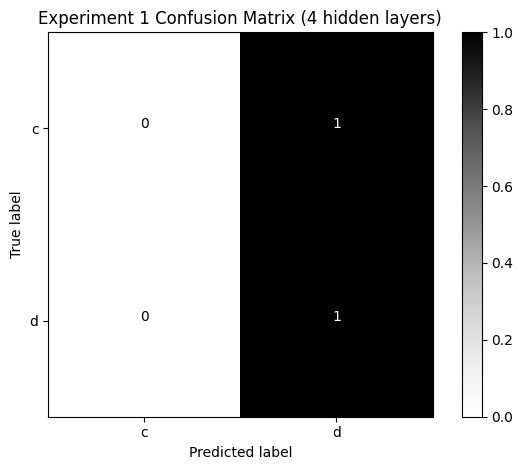


=== Experiment 1 with 5 hidden layers ===
Training data shape: (12, 25, 25, 3)
Testing data shape: (2, 25, 25, 3)


<ipython-input-22-0d620705e43d>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 - 3s - 1s/step - accuracy: 0.3333 - loss: 0.6949
Epoch 2/10
3/3 - 0s - 19ms/step - accuracy: 0.2500 - loss: 0.6956
Epoch 3/10
3/3 - 0s - 20ms/step - accuracy: 0.5000 - loss: 0.6946
Epoch 4/10
3/3 - 0s - 18ms/step - accuracy: 0.5833 - loss: 0.6914
Epoch 5/10
3/3 - 0s - 20ms/step - accuracy: 0.5000 - loss: 0.6957
Epoch 6/10
3/3 - 0s - 19ms/step - accuracy: 0.7500 - loss: 0.6909
Epoch 7/10
3/3 - 0s - 19ms/step - accuracy: 0.4167 - loss: 0.6910
Epoch 8/10
3/3 - 0s - 18ms/step - accuracy: 0.6667 - loss: 0.6872
Epoch 9/10
3/3 - 0s - 20ms/step - accuracy: 0.3333 - loss: 0.6948
Epoch 10/10
3/3 - 0s - 20ms/step - accuracy: 0.4167 - loss: 0.7043
Test loss: 0.6932, Test accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Confusion Matrix:
[[1 0]
 [1 0]]


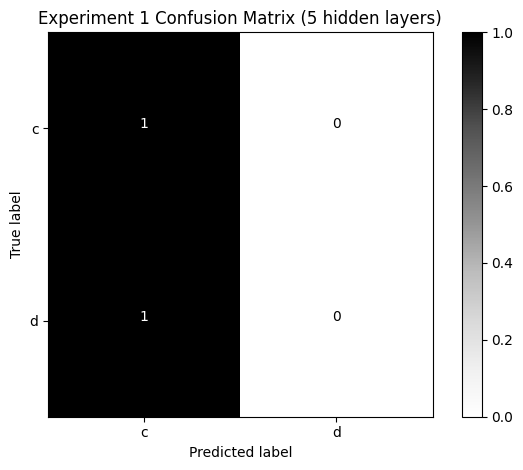


=== Experiment 2: Train on Colored Images; Test on Black & White (PGM) ===

=== Experiment 2 with 3 hidden layers ===
Training data shape: (2, 25, 25, 3)
Testing data shape: (12, 25, 25, 3)
Epoch 1/10


<ipython-input-22-0d620705e43d>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 0.6937
Epoch 2/10
1/1 - 0s - 58ms/step - accuracy: 1.0000 - loss: 0.6917
Epoch 3/10
1/1 - 0s - 48ms/step - accuracy: 1.0000 - loss: 0.6900
Epoch 4/10
1/1 - 0s - 48ms/step - accuracy: 1.0000 - loss: 0.6871
Epoch 5/10
1/1 - 0s - 48ms/step - accuracy: 1.0000 - loss: 0.6681
Epoch 6/10
1/1 - 0s - 49ms/step - accuracy: 1.0000 - loss: 0.6847
Epoch 7/10
1/1 - 0s - 59ms/step - accuracy: 0.0000e+00 - loss: 0.7094
Epoch 8/10
1/1 - 0s - 46ms/step - accuracy: 1.0000 - loss: 0.6772
Epoch 9/10
1/1 - 0s - 48ms/step - accuracy: 0.0000e+00 - loss: 0.7082
Epoch 10/10
1/1 - 0s - 49ms/step - accuracy: 0.5000 - loss: 0.7172
Test loss: 0.6932, Test accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Confusion Matrix:
[[6 0]
 [6 0]]


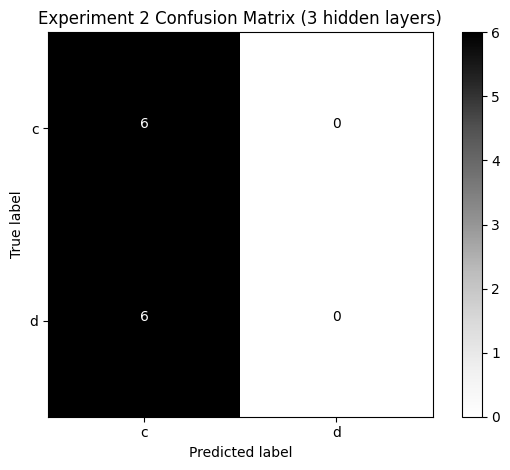


=== Experiment 2 with 4 hidden layers ===
Training data shape: (2, 25, 25, 3)
Testing data shape: (12, 25, 25, 3)


<ipython-input-22-0d620705e43d>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 - 2s - 2s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 2/10
1/1 - 0s - 51ms/step - accuracy: 0.5000 - loss: 0.6938
Epoch 3/10
1/1 - 0s - 53ms/step - accuracy: 0.5000 - loss: 0.6901
Epoch 4/10
1/1 - 0s - 50ms/step - accuracy: 0.5000 - loss: 0.6936
Epoch 5/10
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 0.6982
Epoch 6/10
1/1 - 0s - 52ms/step - accuracy: 1.0000 - loss: 0.6853
Epoch 7/10
1/1 - 0s - 59ms/step - accuracy: 0.5000 - loss: 0.6985
Epoch 8/10
1/1 - 0s - 51ms/step - accuracy: 0.0000e+00 - loss: 0.7212
Epoch 9/10
1/1 - 0s - 51ms/step - accuracy: 0.5000 - loss: 0.6821
Epoch 10/10
1/1 - 0s - 60ms/step - accuracy: 0.5000 - loss: 0.6845


Test loss: 0.6932, Test accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Confusion Matrix:
[[0 6]
 [0 6]]


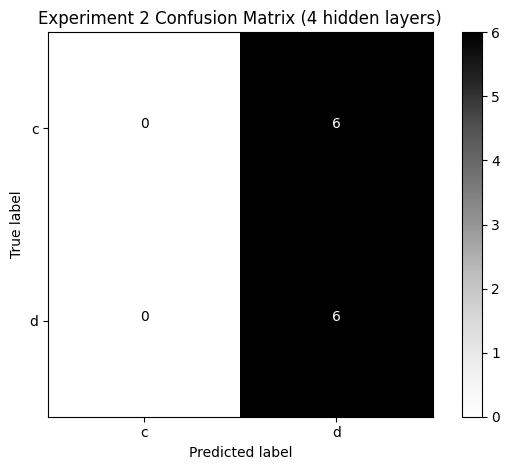


=== Experiment 2 with 5 hidden layers ===
Training data shape: (2, 25, 25, 3)
Testing data shape: (12, 25, 25, 3)


<ipython-input-22-0d620705e43d>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 - 3s - 3s/step - accuracy: 0.5000 - loss: 0.6929
Epoch 2/10
1/1 - 0s - 47ms/step - accuracy: 0.5000 - loss: 0.6930
Epoch 3/10
1/1 - 0s - 60ms/step - accuracy: 0.0000e+00 - loss: 0.6945
Epoch 4/10
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 0.6972
Epoch 5/10
1/1 - 0s - 51ms/step - accuracy: 0.0000e+00 - loss: 0.6970
Epoch 6/10
1/1 - 0s - 50ms/step - accuracy: 0.5000 - loss: 0.6967
Epoch 7/10
1/1 - 0s - 48ms/step - accuracy: 0.5000 - loss: 0.6959
Epoch 8/10
1/1 - 0s - 50ms/step - accuracy: 0.5000 - loss: 0.6898
Epoch 9/10
1/1 - 0s - 52ms/step - accuracy: 1.0000 - loss: 0.6902
Epoch 10/10
1/1 - 0s - 59ms/step - accuracy: 0.5000 - loss: 0.6900


Test loss: 0.6932, Test accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Confusion Matrix:
[[0 6]
 [0 6]]


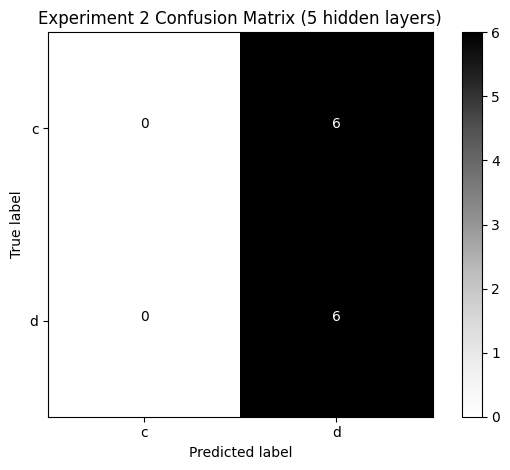

In [22]:
# For reproducibility
np.random.seed(42)

#load all images from Colab directory
def load_images(path, labels=('c', 'd'), mode='train_bw', force_three_channel=True):

    images, targets = [], []
    label_map = {lbl: idx for idx, lbl in enumerate(labels)}

    # Select file extensions
    if mode in ['train_bw', 'test_bw']:
        valid_ext = ['pgm']
    elif mode in ['train_color', 'test_color']:
        valid_ext = ['gif', 'jpg', 'jpeg', 'png']


    for file in sorted(os.listdir(path)):
        label = file[0].lower()
        ext = file.split('.')[-1].lower()
        if label not in labels or ext not in valid_ext:
            continue

        img_path = os.path.join(path, file)
        img = imageio.imread(img_path)
        if mode in ['train_bw', 'test_bw']:
            # Convert to grayscale if necessary
            if img.ndim == 3:
                img = rgb2gray(img)
            img = resize(img, (25, 25), anti_aliasing=True)
            img = img / 255.0
            # Add a channel dimension (will be 1 channel)
            img = img.reshape(25, 25, 1)
            if force_three_channel:
                # Replicate the single channel into three channels
                img = np.concatenate([img, img, img], axis=-1)
        else:
            # For color mode, retain color if available. If the image is not colored, duplicate channels.
            if img.ndim != 3:
                img = np.stack((img,) * 3, axis=-1)
            img = resize(img, (25, 25), anti_aliasing=True)
            img = img / 255.0
            if force_three_channel and img.shape[-1] != 3:
                if img.shape[-1] == 1:
                    img = np.concatenate([img, img, img], axis=-1)
                else:
                    img = img[..., :3]
        images.append(img)
        targets.append(label_map[label])
    return np.array(images), np.array(targets)


def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()



def build_model(input_shape, num_hidden_layers=3):

    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    for _ in range(num_hidden_layers):
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# runs a single experiment given the training/testing and number of hidden layers(3,4,5)
def run_experiment(exp_name, mode_train, mode_test, hidden_layers, epochs=10, batch_size=4):

    print("\n=== {} with {} hidden layers ===".format(exp_name, hidden_layers))
    X_train, y_train = load_images('.', mode=mode_train, force_three_channel=True)
    X_test, y_test = load_images('.', mode=mode_test, force_three_channel=True)
    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)

    # Print shapes for clarity (optional)
    print("Training data shape:", X_train.shape)
    print("Testing data shape:", X_test.shape)

    input_shape = X_train.shape[1:]  # Expected to be (25, 25, 3)
    model = build_model(input_shape, num_hidden_layers=hidden_layers)
    history = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, verbose=2)
    score = model.evaluate(X_test, y_test_cat, verbose=0)
    print("Test loss: {:.4f}, Test accuracy: {:.4f}".format(score[0], score[1]))

    pred = model.predict(X_test)
    pred_labels = np.argmax(pred, axis=1)
    cm = confusion_matrix(y_test, pred_labels)
    print("Confusion Matrix:")
    print(cm)
    plot_confusion_matrix(cm, classes=['c', 'd'], title='{} Confusion Matrix ({} hidden layers)'.format(exp_name, hidden_layers))


def main():

    hidden_layer_options = [3, 4, 5]

    print("=== Experiment 1: Train on Black & White (PGM); Test on Colored Images ===")
    # For Experiment 1, training mode: 'train_bw'; testing mode: 'test_color'
    for hl in hidden_layer_options:
        run_experiment("Experiment 1", mode_train='train_bw', mode_test='test_color', hidden_layers=hl, epochs=10, batch_size=4)

    print("\n=== Experiment 2: Train on Colored Images; Test on Black & White (PGM) ===")
    # For Experiment 2, training mode: 'train_color'; testing mode: 'test_bw'
    for hl in hidden_layer_options:
        run_experiment("Experiment 2", mode_train='train_color', mode_test='test_bw', hidden_layers=hl, epochs=10, batch_size=4)


if __name__ == '__main__':
    main()

=====================================================================================

================================================================================================